# Exercise 1

In [1]:
factorial(5)

120

In [2]:
function factorial2(n)
    if n != 1
        n * factorial2(n - 1)
    else
        1
    end
end

factorial2 (generic function with 1 method)

In [4]:
factorial2(4)

24

# Exercise 2

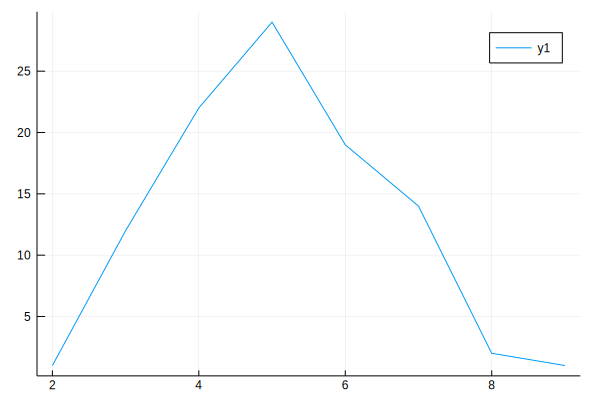

In [21]:
using Plots

function binomial_rv(n, p)
    count = 0
    for i in 1:n
        sort = rand()
        if sort < p
            count += 1
        end
    end
    return count
end
    
result = zeros(100)
for i in 1:100    
    result[i] = binomial_rv(10, 0.5)
end

x = sort(unique(result))
y = zeros(length(x))

for index in eachindex(x)
    y[index] = length(filter(a -> a == x[index], result))
end

plot(x, y)

# Exercise 3

In [29]:
#Square side 1 and radius 0.5

radius = 0.5
n = 0
number = 1000000
for i in 1:number
    RandomX = rand()
    RandomY = rand()
    dist = sqrt((RandomX - 0.5)^2 + (RandomY - 0.5)^2)
    if dist <= radius
        n += 1
    end
end
prob = n / number
area = prob
pi = area / radius^2
print(pi)

3.140804

# Exercise 4

In [35]:
#head = true

head = 0
dollar = 0
for trying in 1:10
    if rand() < 0.5
        coin = true
        head += 1
    else
        coin = false
        head = 0
    end
    if head == 3
        dollar = 1
        break
    end
end
print(dollar)

1

# Exercise 5

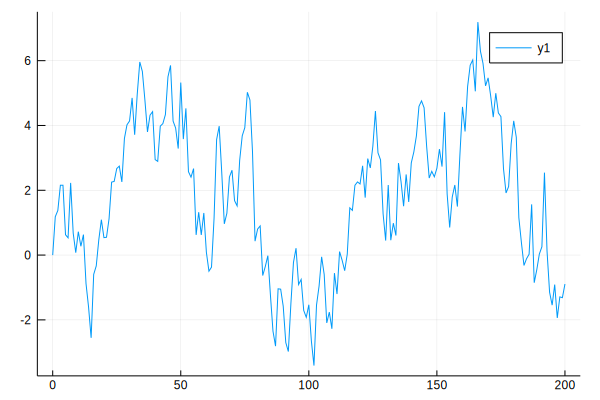

In [40]:
using Plots

n = 200
α = 0.9
x = [0.0]
t = [0:n;]

for number in t[2:end]
    push!(x, α * x[end] + randn())
end

plot(t, x)

# Exercise 6

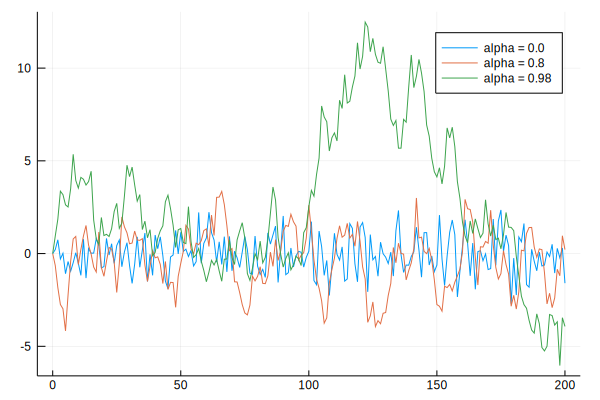

In [60]:
using Plots

function timesseries(n, α)
    
    x = [0.0]
    t = [0:n;]

    for number in t[2:end]
        push!(x, α * x[end] + randn())
    end
    
    return t, x
end

n = 200
plot(timesseries(n, 0.0)..., label = "alpha = 0.0")
plot!(timesseries(n, 0.8)..., label = "alpha = 0.8")
plot!(timesseries(n, 0.98)..., label = "alpha = 0.98")

# Exercise 7

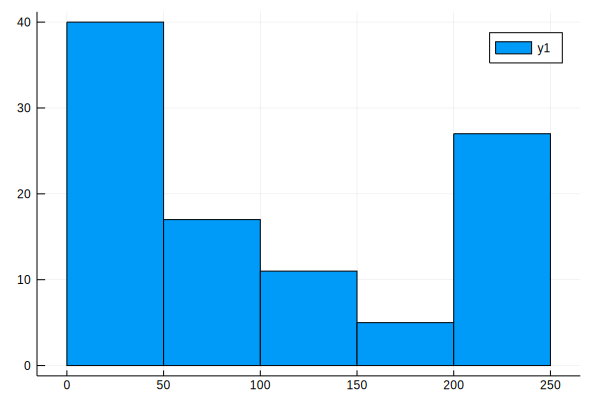

In [61]:
using StatsBase, Plots

function firstpassagetime(tmax, α, σ)    
    x = [1.0]
    t = [0:tmax;]

    for number in t[2:end]
        push!(x, α * x[end] + σ * randn())
        if x[end] <= 0
            break
        end
    end
    
    return length(x) - 1
end

result = [firstpassagetime(200, 1.0, 0.2) for i in 1:100]
plot(fit(Histogram, result))

# Exercise 8(a)

In [8]:
using ForwardDiff

# good style
function newtonsmethod(f, f_prime; x_0, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = x_0
    normdiff = 1
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old - f(x_old) / f_prime(x_old) # use the passed in map
        normdiff = abs(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

f(x) = (x - 2)^3
f_prime(x) = ForwardDiff.derivative(f, x)

x_0 = 3

sol = newtonsmethod(f, f_prime; x_0 = x_0)
println("Root = $(sol.value), and tolerance = $(sol.normdiff) in $(sol.iter)"*
        " iterations")


Root = 2.0000001356565904, and tolerance = 6.782829498064302e-8 in 40 iterations


In [4]:
using ForwardDiff

f(x) = (x - 1)^3

f_prime(x) = ForwardDiff.derivative(f, x)

f_prime(1)

0